In [3]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import xverse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from dmba import classificationSummary, regressionSummary
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
%matplotlib inline

no display found. Using non-interactive Agg backend


In [4]:
org=pd.read_csv('org.csv', parse_dates=["date_of_joining","last_working_date", "cutoff_date", "date_of_birth"])
org.head(5)

,emp_id,status,turnover,location,level,date_of_joining,date_of_birth,last_working_date,gender,department,mgr_id,cutoff_date,generation,emp_age
0,E11061,Inactive,1,New York,Analyst,2012-03-22,1992-03-22,2014-11-09,Male,Customer Operations,E1712,2014-12-31,Millennials,22.5
1,E1031,Inactive,1,New York,Analyst,2012-09-03,1992-10-01,2014-05-06,Female,Customer Operations,E10524,2014-12-31,Millennials,22.4
2,E6213,Inactive,1,New York,Analyst,2012-06-01,1992-06-02,2014-04-30,Female,Customer Operations,E4443,2014-12-31,Millennials,22.2
3,E5900,Inactive,1,New York,Analyst,2012-03-22,1991-12-19,2014-09-04,Female,Customer Operations,E3638,2014-12-31,Millennials,22.3
4,E3044,Inactive,1,Florida,Analyst,2012-03-29,1991-10-12,2014-01-23,Female,Customer Operations,E3312,2014-12-31,Millennials,22.1


In [5]:
org.shape

(2291, 14)

In [6]:
org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 14 columns):
emp_id               2291 non-null object
status               2291 non-null object
turnover             2291 non-null int64
location             2291 non-null object
level                2291 non-null object
date_of_joining      2291 non-null datetime64[ns]
date_of_birth        2291 non-null datetime64[ns]
last_working_date    410 non-null datetime64[ns]
gender               2291 non-null object
department           2291 non-null object
mgr_id               2291 non-null object
cutoff_date          2291 non-null datetime64[ns]
generation           2291 non-null object
emp_age              2291 non-null float64
dtypes: datetime64[ns](4), float64(1), int64(1), object(8)
memory usage: 250.7+ KB


# Data cleaning

**Changing data types of some columns**
**Filling NaN values with 0

In [7]:
#print(today_date)
org["last_working_date"]= org["last_working_date"].fillna(pd.to_datetime("2021-03-12"))
org.head(10)

,emp_id,status,turnover,location,level,date_of_joining,date_of_birth,last_working_date,gender,department,mgr_id,cutoff_date,generation,emp_age
0,E11061,Inactive,1,New York,Analyst,2012-03-22,1992-03-22,2014-11-09,Male,Customer Operations,E1712,2014-12-31,Millennials,22.5
1,E1031,Inactive,1,New York,Analyst,2012-09-03,1992-10-01,2014-05-06,Female,Customer Operations,E10524,2014-12-31,Millennials,22.4
2,E6213,Inactive,1,New York,Analyst,2012-06-01,1992-06-02,2014-04-30,Female,Customer Operations,E4443,2014-12-31,Millennials,22.2
3,E5900,Inactive,1,New York,Analyst,2012-03-22,1991-12-19,2014-09-04,Female,Customer Operations,E3638,2014-12-31,Millennials,22.3
4,E3044,Inactive,1,Florida,Analyst,2012-03-29,1991-10-12,2014-01-23,Female,Customer Operations,E3312,2014-12-31,Millennials,22.1
5,E4008,Active,0,Florida,Assistant Manager,2013-11-27,1992-06-05,2021-03-12,Female,Customer Operations,E13933,2014-12-31,Millennials,23.0
6,E6636,Active,0,New York,Specialist,2012-02-17,1992-01-23,2021-03-12,Male,Customer Operations,E12038,2014-12-31,Millennials,23.0
7,E13796,Inactive,1,New York,Analyst,2012-03-30,1990-12-19,2014-11-05,Male,Customer Operations,E10524,2014-12-31,Millennials,23.4
8,E13549,Active,0,New York,Analyst,2012-09-03,1991-12-22,2021-03-12,Male,Customer Operations,E10524,2014-12-31,Millennials,23.0
9,E13430,Inactive,1,New York,Analyst,2012-09-03,1991-08-19,2014-10-16,Female,Customer Operations,E12897,2014-12-31,Millennials,23.2


In [8]:
org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 14 columns):
emp_id               2291 non-null object
status               2291 non-null object
turnover             2291 non-null int64
location             2291 non-null object
level                2291 non-null object
date_of_joining      2291 non-null datetime64[ns]
date_of_birth        2291 non-null datetime64[ns]
last_working_date    2291 non-null datetime64[ns]
gender               2291 non-null object
department           2291 non-null object
mgr_id               2291 non-null object
cutoff_date          2291 non-null datetime64[ns]
generation           2291 non-null object
emp_age              2291 non-null float64
dtypes: datetime64[ns](4), float64(1), int64(1), object(8)
memory usage: 250.7+ KB


# Exploratory Data Analysis

**Time frame of data** 

In [9]:
time_max=org["cutoff_date"].max()
time_min=org["date_of_joining"].min()
print("End time for data collection", time_max)
print("Starting time for data collection", time_min)

End time for data collection 2014-12-31 00:00:00
Starting time for data collection 1994-01-21 00:00:00


In [10]:
# Number of employees at the start of the 20 year time period- active and inactive
org["status"].value_counts()

Active      1881
Inactive     410
Name: status, dtype: int64

**Turnover rate= Total number of inactive employees / (Active employees at beginning of time period+Active employees at end of time period)/2**

In [11]:
count_2004_active=org[(org["date_of_joining"]<="2004-12-31")&
                      (org["last_working_date"]>"2004-12-31")]["emp_id"].count()
count_2004_inactive=org[(org["date_of_joining"]<="2004-12-31")
                       &(org["last_working_date"]<"2004-12-31")]["emp_id"].count()
print("Number of active employees in 2004: ",count_2004_active)
print("Number of inactive employees in 2004: ",count_2004_inactive)
print("\n")

count_2005_active = org[(org["date_of_joining"]<="2005-12-31") &
                      (org["last_working_date"]>="2005-12-31")]["emp_id"].count()
count_2005_inactive = org[(org["date_of_joining"]<="2005-12-31") &
                        (org["last_working_date"]<= "2005-12-31")]["emp_id"].count()
print("Number of active employees in 2005: ",count_2005_active)
print("Number of inactive employees in 2005: ",count_2005_inactive)
print("\n")

count_2006_active=org[(org["date_of_joining"]<="2006-12-31") &
                      (org["last_working_date"]>="2006-12-31")]["emp_id"].count()
count_2006_inactive=org[(org["date_of_joining"]<="2006-12-31") &
                        (org["last_working_date"]<="2006-12-31")]["emp_id"].count()
print("Number of active employees in 2006: ",count_2006_active)
print("Number of inactive employees in 2006: ",count_2006_inactive)
print("\n")

count_2013_active=org[(org["date_of_joining"]<="2013-12-31") &
                      (org["last_working_date"]>="2013-12-31")]["emp_id"].count()
count_2013_inactive=org[(org["date_of_joining"]<="2013-12-31") &
                        (org["last_working_date"]<="2013-12-31")]["emp_id"].count()
print("Number of active employees in 2013: ",count_2013_active)
print("Number of inactive employees in 2013: ",count_2013_inactive)
print("\n")


count_2014_active=org[(org["date_of_joining"]<="2014-12-31") &
                      (org["last_working_date"]>="2014-12-31")]["emp_id"].count()
count_2014_inactive=org[(org["date_of_joining"]<="2014-12-31") &
                        (org["last_working_date"]<="2014-12-31")]["emp_id"].count()
print("Number of active employees in 2014: ",count_2014_active)
print("Number of inactive employees in 2014: ",count_2014_inactive)

Number of active employees in 2004:  148
Number of inactive employees in 2004:  0


Number of active employees in 2005:  206
Number of inactive employees in 2005:  0


Number of active employees in 2006:  329
Number of inactive employees in 2006:  0


Number of active employees in 2013:  2291
Number of inactive employees in 2013:  0


Number of active employees in 2014:  1881
Number of inactive employees in 2014:  410


In [12]:
average1=(2291+1881)/2
turnover_rate_13_14= 410/average1 
turnover_rate_13_14

0.1965484180249281

In [13]:
turnover_year=org.groupby("cutoff_date")["turnover"].mean()
print(turnover_year)

cutoff_date
2014-12-31    0.178961
Name: turnover, dtype: float64


In [14]:
# Number of new joinees every 3 years

In [15]:
joining_1994_1997 = org[(org["date_of_joining"]>="1994-01-01") & 
                               (org["date_of_joining"]<="1997-12-31")]

joining_1997_2000 = org[(org["date_of_joining"]>="1997-01-01") & 
                               (org["date_of_joining"]<="2000-12-31")]

joining_2000_2003 = org[(org["date_of_joining"]>="2000-01-01") & 
                               (org["date_of_joining"]<="2003-12-31")]

joining_2003_2006= org[(org["date_of_joining"]>="2003-01-01") & 
                               (org["date_of_joining"]<="2006-12-31")]

joining_2006_2009 = org[(org["date_of_joining"]>="2006-01-01") & 
                               (org["date_of_joining"]<="2009-12-31")]

joining_2009_2012 = org[(org["date_of_joining"]>="2009-01-01") & 
                               (org["date_of_joining"]<="2012-12-31")]

joining_2012_2015 = org[(org["date_of_joining"]>="2012-01-01") & 
                               (org["date_of_joining"]<="2015-12-31")]


**Showing turnover rate level-wise**

level
Analyst              0.215087
Assistant Manager    0.036458
Director             0.000000
Manager              0.043478
Senior Manager       0.000000
Specialist           0.148571
Vice President       0.000000
Name: turnover, dtype: float64


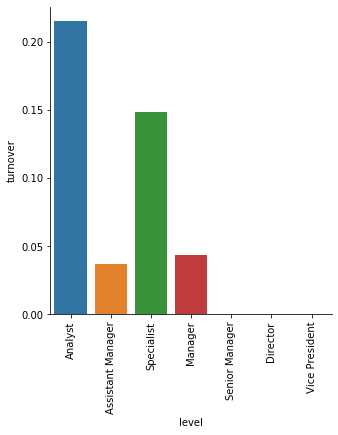

'Turnover rate is highest at Analyst and Specialist level'

In [16]:
turnover_level=org.groupby("level")["turnover"].mean()
print(turnover_level)
sns.catplot(kind="bar", 
            x="level",
            y="turnover", 
            data=org,
            ci=None)
plt.xticks(rotation=90)
plt.show()

"""Turnover rate is highest at Analyst and Specialist level"""

(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text xticklabel objects>)

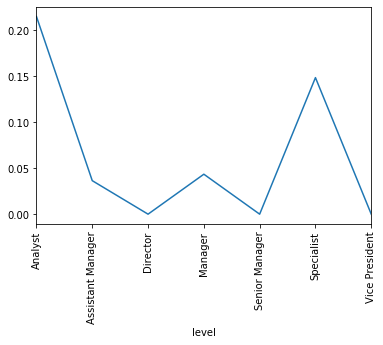

In [17]:
turnover_level.plot()
plt.xticks(rotation=90)

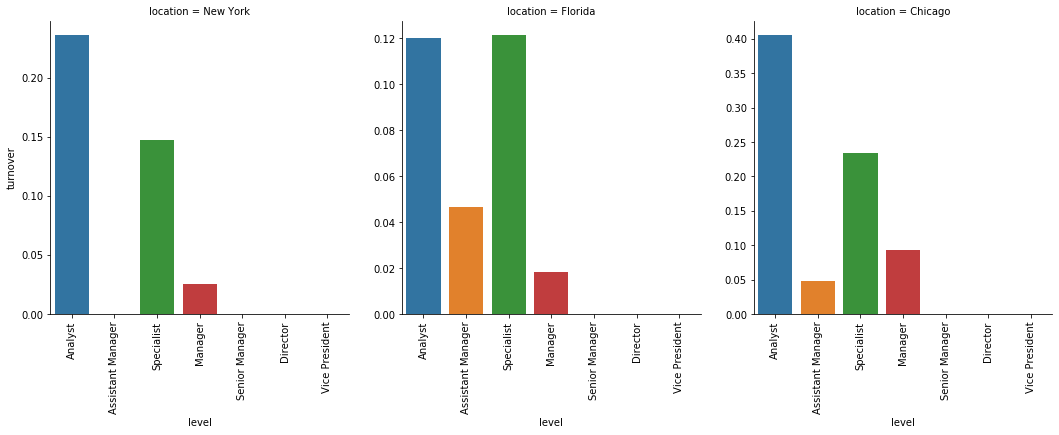

'Turnover rate is highest at Analyst and Specialist level at all locations.'

In [18]:
g=sns.catplot(data=org,
            kind="bar", 
            x="level",
            y="turnover",
            col="location",
            col_wrap=3,
            ci=None,
            sharey=False)
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible= True, rotation=90)
#plt.xticks(rotation=90)
plt.show()

"""Turnover rate is highest at Analyst and Specialist level at all locations."""

location
Chicago     0.325641
Florida     0.105513
New York    0.202591
Name: turnover, dtype: float64


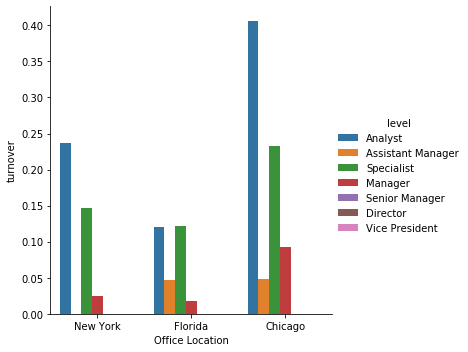

'Turnover rate is high in Chicago as compared to other locations'

In [19]:
ans= org.groupby("location")["turnover"].agg(np.mean)
print(ans)
sns.catplot(kind="bar", x="location",y ="turnover", hue="level", data=org, ci=None)
plt.xlabel("Office Location")
plt.show()
"""Turnover rate is high in Chicago as compared to other locations"""

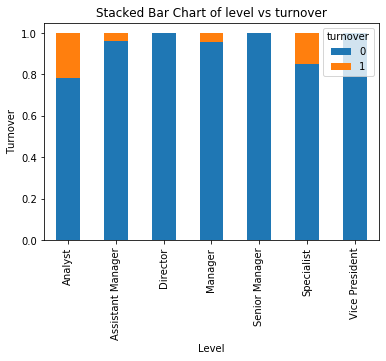

In [20]:
table=pd.crosstab(org.level,org.turnover)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of level vs turnover')
plt.xlabel('Level')
plt.ylabel('Turnover')
plt.savefig('Level vs Turnover')

**We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.**

In [21]:
org.groupby("location").mean()

,turnover,emp_age
location,,
Chicago,0.325641,31.247436
Florida,0.105513,31.011692
New York,0.202591,27.915548


In [22]:
org.groupby("level").mean()
# the following gives same output too
#org.pivot_table(values=["turnover","emp_age"], index="level", aggfunc="mean")

,turnover,emp_age
level,,
Analyst,0.215087,28.480611
Assistant Manager,0.036458,34.354167
Director,0.000000,39.000000
Manager,0.043478,36.166667
Senior Manager,0.000000,39.600000
Specialist,0.148571,31.326286
Vice President,0.000000,40.000000


In [23]:
org.groupby("gender").mean()

,turnover,emp_age
gender,,
Female,0.175389,29.091231
Male,0.180556,30.267424


**BINS CREATION**

In [24]:
# making bins of Employee age
#org["emp_age"].min()---22
#org["emp_age"].max()---58
bins=[20,30,40,50,60]
bin_labels=["20-30","30-40","40-50","50-60"]
org["age_range"]=pd.cut(org["emp_age"],bins=bins,right=True, labels=bin_labels)
org

,emp_id,status,turnover,location,level,date_of_joining,date_of_birth,last_working_date,gender,department,mgr_id,cutoff_date,generation,emp_age,age_range
0,E11061,Inactive,1,New York,Analyst,2012-03-22,1992-03-22,2014-11-09,Male,Customer Operations,E1712,2014-12-31,Millennials,22.5,20-30
1,E1031,Inactive,1,New York,Analyst,2012-09-03,1992-10-01,2014-05-06,Female,Customer Operations,E10524,2014-12-31,Millennials,22.4,20-30
2,E6213,Inactive,1,New York,Analyst,2012-06-01,1992-06-02,2014-04-30,Female,Customer Operations,E4443,2014-12-31,Millennials,22.2,20-30
3,E5900,Inactive,1,New York,Analyst,2012-03-22,1991-12-19,2014-09-04,Female,Customer Operations,E3638,2014-12-31,Millennials,22.3,20-30
4,E3044,Inactive,1,Florida,Analyst,2012-03-29,1991-10-12,2014-01-23,Female,Customer Operations,E3312,2014-12-31,Millennials,22.1,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,E8787,Inactive,1,Florida,Assistant Manager,2013-06-03,1965-07-20,2014-02-09,Male,Customer Operations,E9619,2014-12-31,Generation X,49.0,40-50
2287,E12351,Active,0,Florida,Assistant Manager,1996-09-10,1965-12-06,2021-03-12,Male,Customer Operations,E11070,2014-12-31,Generation X,50.0,40-50
2288,E6282,Active,0,New York,Manager,2012-08-23,1960-05-18,2021-03-12,Female,Customer Operations,E13964,2014-12-31,Baby Boomers,55.0,50-60
2289,E5195,Active,0,Florida,Analyst,2002-07-01,1972-07-01,2021-03-12,Male,Customer Operations,E13943,2014-12-31,Generation X,43.0,40-50


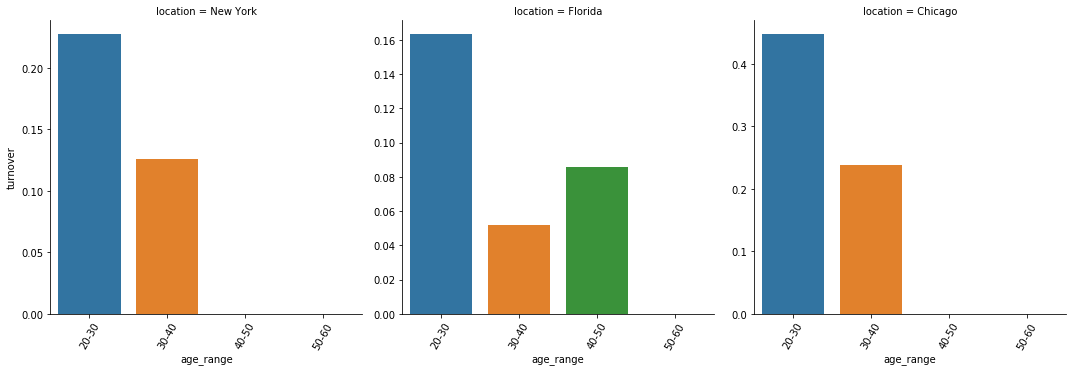

'Turnover is highest among 20-30 years of age range.\nHowever, in Florida, about 8% of turnover is among employees between 40-50 years of age. '

In [25]:
g=sns.catplot(data=org,
            kind="bar", 
            x="age_range",
            y="turnover",
            col="location",
            col_wrap=3,
            ci=None,
            sharey=False)
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible= True, rotation=60)

plt.show()

"""Turnover is highest among 20-30 years of age range.
However, in Florida, about 8% of turnover is among employees between 40-50 years of age. """


# Observations
**Approximately 18% of employees left the organization from 2013-2014 year.**

**The turnover is highest at Analyst and Specialist level.**

**Turnover rate is high in Chicago as compared to other locations.**

**The mean age of employees at Analyst and Specialist level is about 29 and 31 respectively.**

**There is not much difference in turnover rate across male and female employees. The gender does not seem a strong predictor for the turnover.**

In [26]:
org.groupby("level")["location"].value_counts()

level              location
Analyst            Florida     682
                   New York    656
                   Chicago     266
Assistant Manager  Florida     129
                   New York     42
                   Chicago      21
Director           Florida       1
Manager            Florida      55
                   Chicago      43
                   New York     40
Senior Manager     Florida       3
                   New York      2
Specialist         Florida     181
                   New York    109
                   Chicago      60
Vice President     Florida       1
Name: location, dtype: int64

**Talent segments**
We will exclude top level management and middle mangement from analysis.
We will focus our analysis on Analysts and Specialists as they form majority of the workforce. See the count below:

In [27]:
org["level"].value_counts()

Analyst              1604
Specialist            350
Assistant Manager     192
Manager               138
Senior Manager          5
Vice President          1
Director                1
Name: level, dtype: int64

In [28]:
entry_level=["Analyst", "Specialist"]
org2 =org[org.level.isin(entry_level)]

In [29]:
#org1=org[(org["level"]=="Analyst") | (org["level"]=="Specialist")]
#org1

In [30]:
turnover_level=org.groupby("generation")["turnover"].mean()
print(turnover_level)

generation
Baby Boomers    0.000000
Generation X    0.086047
Millennials     0.200646
Name: turnover, dtype: float64


**Exploratory Data Analysis results:**



# Combining data from different HR sources

In [31]:
survey=pd.read_csv("survey.csv")
survey.head()

,mgr_id,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction
0,E1003,0.76,0.76,0.71,0.82
1,E10072,0.65,0.67,0.56,0.84
2,E10081,0.80,0.82,0.73,0.84
3,E10234,0.65,0.63,0.75,0.70
4,E1026,0.70,1.00,1.00,0.92


In [32]:
survey.shape

(350, 5)

In [33]:
#left_df.merge(right_df, on='user_id', how='left', indicator=True)
org_2=org.merge(survey,on="mgr_id", how='left', indicator= False)
org_2.head()                    

,emp_id,status,turnover,location,level,date_of_joining,date_of_birth,last_working_date,gender,department,mgr_id,cutoff_date,generation,emp_age,age_range,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction
0,E11061,Inactive,1,New York,Analyst,2012-03-22,1992-03-22,2014-11-09,Male,Customer Operations,E1712,2014-12-31,Millennials,22.5,20-30,0.686,1.00,1.00,0.86
1,E1031,Inactive,1,New York,Analyst,2012-09-03,1992-10-01,2014-05-06,Female,Customer Operations,E10524,2014-12-31,Millennials,22.4,20-30,0.609,0.91,0.88,0.84
2,E6213,Inactive,1,New York,Analyst,2012-06-01,1992-06-02,2014-04-30,Female,Customer Operations,E4443,2014-12-31,Millennials,22.2,20-30,0.420,0.71,0.57,0.57
3,E5900,Inactive,1,New York,Analyst,2012-03-22,1991-12-19,2014-09-04,Female,Customer Operations,E3638,2014-12-31,Millennials,22.3,20-30,0.588,0.78,0.81,0.85
4,E3044,Inactive,1,Florida,Analyst,2012-03-29,1991-10-12,2014-01-23,Female,Customer Operations,E3312,2014-12-31,Millennials,22.1,20-30,0.518,0.89,0.78,0.91


In [34]:
org_2.shape

(2291, 19)

In [35]:
rating=pd.read_csv("rating.csv")
rating.head()

,emp_id,rating
0,E8,Acceptable
1,E9,Acceptable
2,E12,Acceptable
3,E15,Acceptable
4,E34,Acceptable


In [36]:
org_3=org_2.merge(rating, on="emp_id", how='left', indicator=False)
org_3.head()

,emp_id,status,turnover,location,level,date_of_joining,date_of_birth,last_working_date,gender,department,mgr_id,cutoff_date,generation,emp_age,age_range,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction,rating
0,E11061,Inactive,1,New York,Analyst,2012-03-22,1992-03-22,2014-11-09,Male,Customer Operations,E1712,2014-12-31,Millennials,22.5,20-30,0.686,1.00,1.00,0.86,Acceptable
1,E1031,Inactive,1,New York,Analyst,2012-09-03,1992-10-01,2014-05-06,Female,Customer Operations,E10524,2014-12-31,Millennials,22.4,20-30,0.609,0.91,0.88,0.84,Acceptable
2,E6213,Inactive,1,New York,Analyst,2012-06-01,1992-06-02,2014-04-30,Female,Customer Operations,E4443,2014-12-31,Millennials,22.2,20-30,0.420,0.71,0.57,0.57,Acceptable
3,E5900,Inactive,1,New York,Analyst,2012-03-22,1991-12-19,2014-09-04,Female,Customer Operations,E3638,2014-12-31,Millennials,22.3,20-30,0.588,0.78,0.81,0.85,Acceptable
4,E3044,Inactive,1,Florida,Analyst,2012-03-29,1991-10-12,2014-01-23,Female,Customer Operations,E3312,2014-12-31,Millennials,22.1,20-30,0.518,0.89,0.78,0.91,Acceptable


In [37]:
org_3.shape

(2291, 20)

In [38]:
#org_3.info()

# Feature Engineering---using a different dataset

Process of using domain knowledge to create new variables which help you discover new insights. Crucial step before building a predictive model.

**New features added:**

**Age difference**= manager age- employee age Views, handling pressure, Expectation, Work ethics Younger employees feel Older employees cannot deal with changing work pace.

**JOB hopper**- Job hopper is a person who switches job frequently for financial or career advancement opportunities. Recruiters and hiring managers views job hoppers in a negative light. There is a high chance they would quit soon.
Job hop index = Total work experience/Number of companies worked.

**Employee Tenure**

Inactive employees: date_of_joining & last_working_date 

Active employee : date_joining & cutoff_date(study period end date)

The more the number of years an employee works in the organization, it is less likely that he/she will quit.

In [39]:
org_final=pd.read_csv("org_final.csv", parse_dates=["date_of_joining","last_working_date","cutoff_date"])
org_final.shape

(1954, 34)

In [40]:
#org_final.info()

status
Active      0.708169
Inactive    0.568516
Name: mgr_effectiveness, dtype: float64


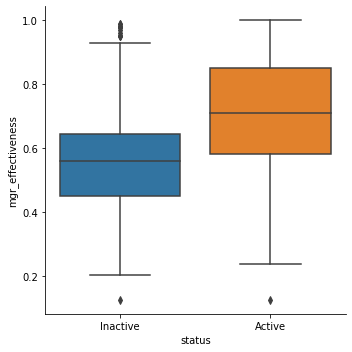

In [41]:
mgr_eff=org_final.groupby("status")["mgr_effectiveness"].agg(np.mean)
print(mgr_eff)
sns.catplot(kind="box",
            data=org_3,
            x="status",
            y="mgr_effectiveness")
plt.show()

# Observations:
**Mean manager effectivess seemed to be higher in active employees as compared to inactive employees.**

**Age difference between manager and employee seem to be higher in inactive employees than active. Therefore coluld be a predictor for turnover.**

**Median job hop index for active and inactive employee are similar.**

**Age difference between manager and employee**

status
Active      4.691946
Inactive    5.982393
Name: age_diff, dtype: float64


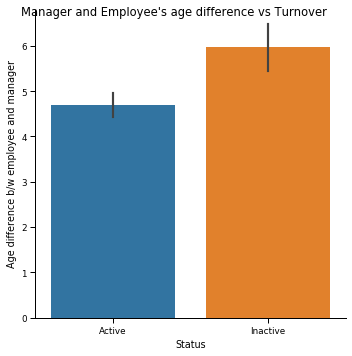

In [42]:
sns.set_context("paper")
org_final["age_diff"]=org_final["mgr_age"]-org_final["emp_age"]
age_2=org_final.groupby("status")["age_diff"].mean()
print(age_2)
g=sns.catplot(kind="bar",
           x="status",
           y="age_diff",
           data=org_final)
g.fig.suptitle("Manager and Employee's age difference vs Turnover ")
g.set(xlabel="Status", ylabel="Age difference b/w employee and manager")
plt.show()

**Job- Hop Index**

If its high means person didnt switch much.
If its low, means employee switched a lot.

In [43]:
# replacing infinite values(inf) with zero
org_final["job_hop_index"]= org_final["total_experience"].div(org_final["no_previous_companies_worked"]).replace(np.inf, 0)
org_final[["job_hop_index"]]

,job_hop_index
0,0.000000
1,0.542222
2,2.850000
3,0.952000
4,0.000000
...,...
1949,4.050000
1950,2.600000
1951,2.425000
1952,1.428571


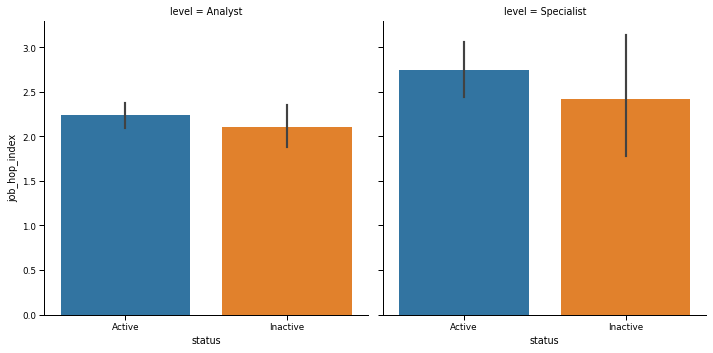

'Analysts have a lower mean job hop index- means they are more likely to leave than Specialists'

In [44]:
sns.catplot(kind="bar",
           y="job_hop_index",
           x="status",
           data=org_final,
           col="level")
plt.show()

"""Analysts have a lower mean job hop index- means they are more likely to leave than Specialists"""

In [45]:
org_final["date_of_joining"].fillna(0)
org_final["last_working_date"].fillna(0)
org_final["date_of_joining"]=pd.to_datetime(org_final["date_of_joining"])
org_final["last_working_date"]=pd.to_datetime(org_final["last_working_date"])
org_final["cutoff_date"]=pd.to_datetime(org_final["cutoff_date"])
#org_final.info()

**Calculating tenure in years**

In [46]:
# Different calculations for 'Active' and "Inactive" employees
org_final.loc[org_final["status"]=="Inactive", "tenure"] = (org_final["last_working_date"]-org_final["date_of_joining"])/np.timedelta64(1, 'Y')
org_final.loc[org_final["status"]=="Active", "tenure"] = (org_final["cutoff_date"]-org_final["date_of_joining"])/np.timedelta64(1, 'Y')
#org_final

In [47]:
ten_lev= org_final.groupby("level")["tenure"].agg(np.median)
print(ten_lev)

level
Analyst       3.438811
Specialist    5.411473
Name: tenure, dtype: float64


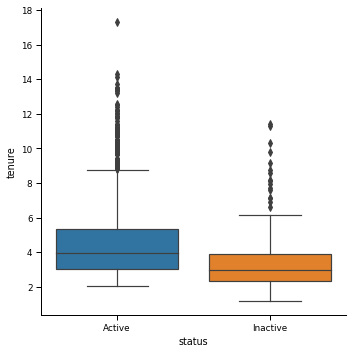

'The median tenure of inactive employees is less than the tenure of active employees.'

In [48]:
sns.catplot(data=org_final, x="status", y="tenure", kind="box")
plt.show()

"""The median tenure of inactive employees is less than the tenure of active employees."""

## Viewing distribution of compensation among all employees


[]

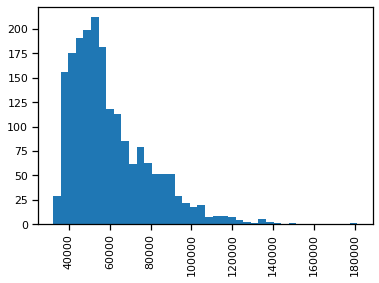

In [49]:
sns.set_context("notebook")
plt.hist(x="compensation", data=org_final, bins=40)
plt.xticks(rotation=90)
plt.plot()

**The distribution is right skewed.**

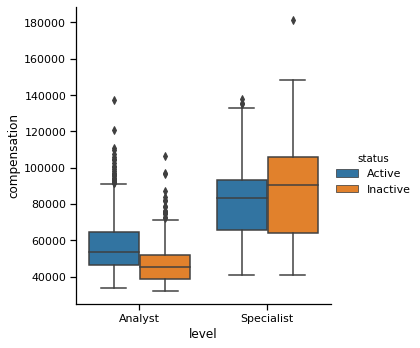

In [50]:
sns.set_context("notebook")
sns.catplot(kind="box",
           y="compensation",
           x="level",
           data=org_final,
           hue="status")
plt.show()

**Compensation varies acrooss jobs and levels. At Analyst level, median compensation of Inactive employees is low when compared to Active employees.(Compensation could be a reason for leaving).**


**At specialist level, the median compensation of inactive employees was higher than active employees(some other reason for leaving).**

Employees always expect that they are paid fairly compared to their co-workers, and hence, maintaining internal pay parity is important.

Competitiveness of each employee's pay can be assessed by Compa-ratio. In this exercise, you'll derive compa-ratio as:

Compa-ratio= Actual compensation/Median compensation

Median compensation is used by organizations to estimate the typical pay for any role/level. This metric helps the organization to correct the compensation of employees who are way below the median compensation.

Remember, median is also known as the 50th percentile. Exactly 50 percent of people make less than the median and 50 percent make more.

In [51]:
median_comp=org_final.groupby("level")["compensation"].agg(np.median)
median_comp

level
Analyst       51840
Specialist    83496
Name: compensation, dtype: int64

In [52]:
org_final.loc[org_final["level"]=="Analyst", "compa_ratio"]=org_final["compensation"]/51840
org_final.loc[org_final["level"]=="Specialist", "compa_ratio"]=org_final["compensation"]/83496
org_final

,emp_id,status,location,level,gender,emp_age,rating,mgr_rating,mgr_reportees,mgr_age,...,cutoff_date,turnover,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction,age_diff,job_hop_index,tenure,compa_ratio
0,E10012,Active,New York,Analyst,Female,25.09,Above Average,Acceptable,9,44.07,...,2014-12-31,0,0.730,0.73,0.73,0.75,18.98,0.000000,3.578444,1.240741
1,E10025,Active,Chicago,Analyst,Female,25.98,Acceptable,Excellent,4,35.99,...,2014-12-31,0,0.581,0.72,0.84,0.85,10.01,0.542222,5.270471,0.929861
2,E10027,Active,Orlando,Specialist,Female,33.40,Acceptable,Above Average,6,35.78,...,2014-12-31,0,0.770,0.85,0.80,0.87,2.38,2.850000,9.883844,1.027738
3,E10048,Active,Chicago,Specialist,Male,24.55,Acceptable,Acceptable,10,26.70,...,2014-12-31,0,0.240,0.42,0.33,0.85,2.15,0.952000,3.616775,0.593274
4,E10060,Active,Orlando,Analyst,Male,31.23,Acceptable,Acceptable,11,34.28,...,2014-12-31,0,0.710,0.78,0.67,0.80,3.05,0.000000,3.028125,1.457870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,E9960,Active,Orlando,Analyst,Male,27.81,Excellent,Acceptable,17,35.14,...,2014-12-31,0,0.760,0.85,0.65,0.90,7.33,4.050000,2.932298,1.377083
1950,E9977,Active,Orlando,Analyst,Male,27.64,Above Average,Above Average,13,29.76,...,2014-12-31,0,0.690,0.75,0.67,0.73,2.12,2.600000,5.270471,1.265972
1951,E9980,Active,New York,Specialist,Male,27.63,Acceptable,Acceptable,5,36.56,...,2014-12-31,0,0.460,0.53,0.46,0.66,8.93,2.425000,6.535384,0.928428
1952,E9992,Active,Chicago,Specialist,Male,28.34,Acceptable,Acceptable,2,36.41,...,2014-12-31,0,0.900,0.89,0.93,0.87,8.07,1.428571,3.425122,0.835729


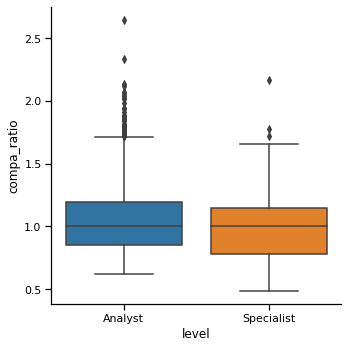

In [53]:
sns.catplot(kind="box",
           x="level",
           y="compa_ratio",
           data=org_final)
plt.show()

**Median compa-ratio is same in both analysts and Specialists.
At specialist level, median is closer to 75th percentile, more number of employees have compa-ratio less than the median. **

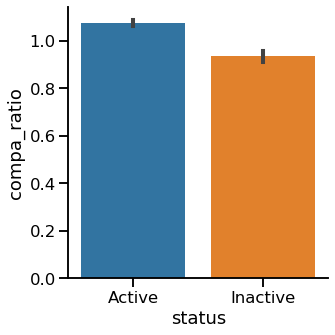

'A greater proportion of inactive employees were paid less than median compensation.'

In [54]:
sns.set_context("talk")
sns.catplot(data=org_final,
            x="status", 
            y="compa_ratio", 
            kind="bar")

plt.show()

"""A greater proportion of inactive employees were paid less than median compensation."""

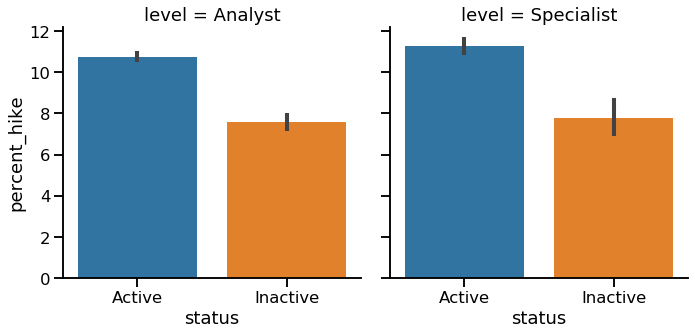

In [55]:
sns.set_context("talk")
sns.catplot(data=org_final,
            x="status", 
            y="percent_hike", 
            kind="bar",
            col="level")
plt.show()

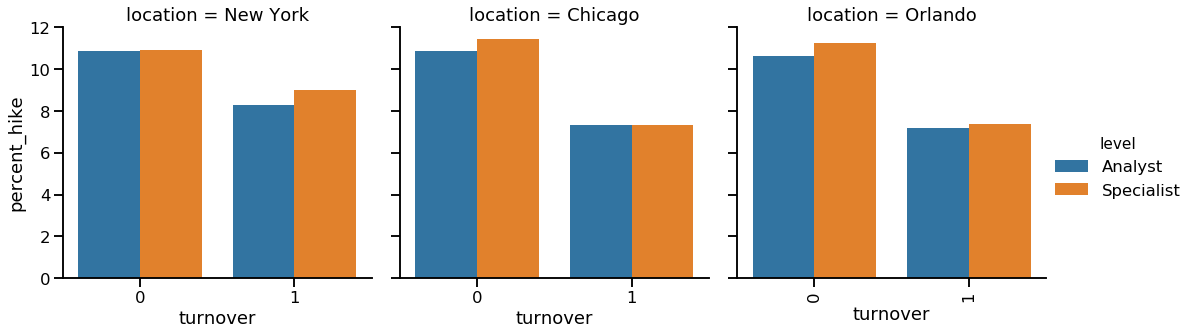

In [56]:
sns.set_context("talk")
sns.catplot(data=org_final,
            x="turnover", 
            y="percent_hike", 
            kind="bar",
            hue="level",
            col="location",
            ci=None)
plt.xticks(rotation=90)
plt.show()

# Predictor variable's contribution

In [57]:
# only for quantitative variables
corr_matrix_f = org_final.corr().round(2)
corr_matrix_f

,emp_age,mgr_reportees,mgr_age,mgr_tenure,compensation,percent_hike,hiring_score,no_previous_companies_worked,distance_from_home,total_dependents,...,monthly_overtime_hrs,turnover,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction,age_diff,job_hop_index,tenure,compa_ratio
emp_age,1.00,-0.10,0.12,0.02,0.61,0.01,0.02,0.05,-0.08,0.18,...,-0.03,-0.17,0.06,0.04,-0.02,-0.05,-0.61,0.30,0.59,0.52
mgr_reportees,-0.10,1.00,-0.14,0.03,-0.14,-0.08,0.01,-0.03,0.12,0.06,...,0.03,0.23,-0.21,-0.02,-0.03,-0.04,-0.05,-0.01,-0.08,-0.09
mgr_age,0.12,-0.14,1.00,0.20,0.13,0.04,0.02,-0.01,-0.02,-0.03,...,-0.02,-0.03,-0.05,-0.05,-0.08,-0.08,0.71,0.02,0.08,0.10
mgr_tenure,0.02,0.03,0.20,1.00,-0.04,-0.01,0.02,-0.00,-0.01,-0.02,...,-0.01,-0.05,-0.05,0.04,-0.07,-0.02,0.15,-0.02,0.09,-0.04
compensation,0.61,-0.14,0.13,-0.04,1.00,0.15,0.07,0.02,-0.11,0.10,...,-0.01,-0.18,0.08,0.04,-0.03,-0.06,-0.33,0.19,0.44,0.76
percent_hike,0.01,-0.08,0.04,-0.01,0.15,1.00,0.04,-0.01,-0.21,-0.12,...,-0.07,-0.38,0.11,0.03,0.03,0.04,0.02,-0.03,0.08,0.15
hiring_score,0.02,0.01,0.02,0.02,0.07,0.04,1.00,0.06,0.01,0.01,...,-0.03,0.01,-0.03,-0.03,-0.06,-0.01,-0.00,0.01,-0.04,0.08
no_previous_companies_worked,0.05,-0.03,-0.01,-0.00,0.02,-0.01,0.06,1.00,0.01,0.04,...,0.00,-0.00,0.00,0.03,0.01,0.02,-0.05,-0.41,0.02,0.02
distance_from_home,-0.08,0.12,-0.02,-0.01,-0.11,-0.21,0.01,0.01,1.00,0.16,...,0.12,0.53,-0.13,0.00,-0.02,-0.04,0.04,-0.02,-0.13,-0.13
total_dependents,0.18,0.06,-0.03,-0.02,0.10,-0.12,0.01,0.04,0.16,1.00,...,0.07,0.31,-0.07,0.03,-0.00,-0.04,-0.15,0.01,0.07,0.04


In [58]:
# distance_from_home, compensation, mgr_effectiveness, perf_satisfaction, age_diff, tenure, 

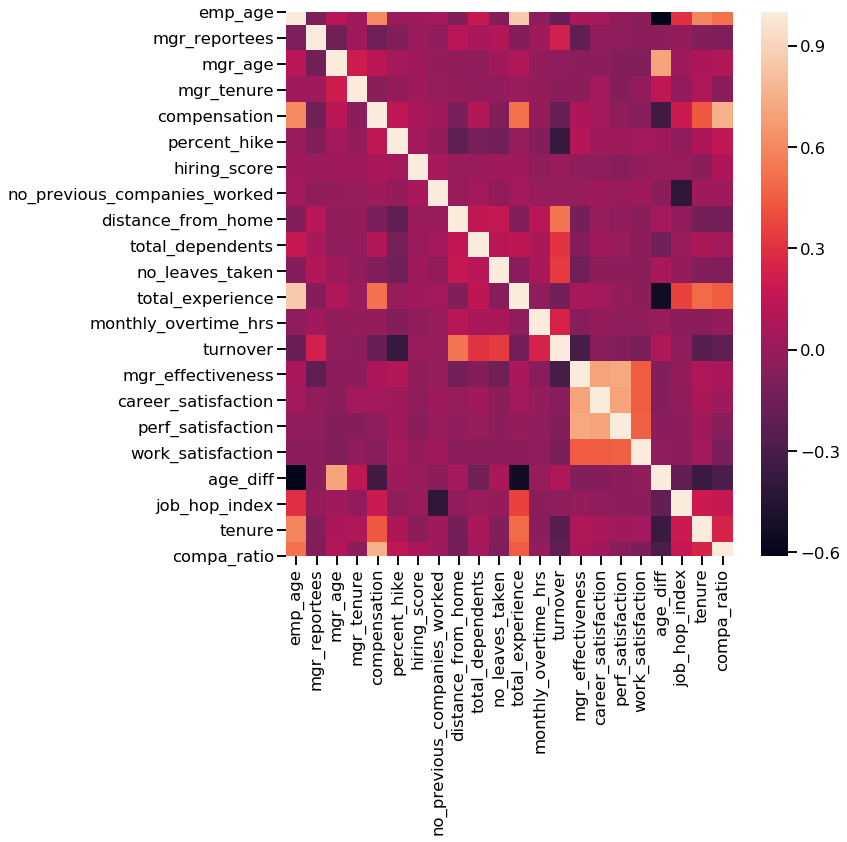

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix_f)

Weight of evidence (WOE) and Information value (IV) are simple, yet powerful techniques to perform variable transformation and selection. These concepts have huge connection with the logistic regression modeling technique. It is widely used in credit scoring to measure the separation of good vs bad customers.


In [60]:
# removing variables which have no predictive power

# emp_id, mgr_id ----are id columns
# date_of_joining, last_working_date, cutoff_date ----tenure is a linear combination of these columns.
# mgr_age, emp_age-----age_diff is a linear combination of these columns.
# department-----
# status ---is same as turnover

In [61]:
from xverse.transformer import MonotonicBinning
independent_var=['location', 'level', 'gender', 'emp_age', 'rating','mgr_rating', 'mgr_reportees', 'mgr_age', 
                 'mgr_tenure', 'compensation','percent_hike', 'hiring_score', 'hiring_source',
                 'no_previous_companies_worked','distance_from_home','total_dependents', 'marital_status', 'education',
                 'promotion_last_2_years', 'no_leaves_taken', 'total_experience',
                 'monthly_overtime_hrs','department','turnover', 'mgr_effectiveness',
                 'career_satisfaction', 'perf_satisfaction', 'work_satisfaction','age_diff', 'job_hop_index', 'tenure', 'compa_ratio']
x_check=org_final[independent_var]
y_check=org_final["turnover"]
clf = MonotonicBinning()
clf.fit(x_check, y_check)

#print(clf.bins)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [62]:
from xverse.transformer import WOE

clf = WOE()
clf.fit(x_check, y_check)

print(clf.woe_df.head()) #Weight of Evidence transformation dataset

         Variable_Name         Category  Count  Event  Non_Event  Event_Rate  \
0             age_diff  (-15.071, 2.48]    652    100        552    0.153374   
1             age_diff     (2.48, 7.59]    651    144        507    0.221198   
2             age_diff    (7.59, 24.98]    651    153        498    0.235023   
3  career_satisfaction   (-0.001, 0.75]    689    151        538    0.219158   
4  career_satisfaction     (0.75, 0.87]    631    128        503    0.202853   

   Non_Event_Rate  Event_Distribution  Non_Event_Distribution       WOE  \
0        0.846626            0.251889                0.354528 -0.341798   
1        0.778802            0.362720                0.325626  0.107882   
2        0.764977            0.385390                0.319846  0.186418   
3        0.780842            0.380353                0.345536  0.096001   
4        0.797147            0.322418                0.323057 -0.001980   

   Information_Value  
0           0.051302  
1           0.051302  

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [63]:
print(clf.iv_df) #Information value dataset

# Less than 0.02 - Not useful for prediction
# 0.02 - 0.1 - Weak predictive power
# 0.1 - 0.3  - Medium predictive power
# 0.3 - 0.5  - Strong predictive power
# >0.5       - Suspicious predictive power.

                   Variable_Name  Information_Value
28              total_dependents           1.081841
5             distance_from_home           0.878127
23                  percent_hike           0.769505
16             mgr_effectiveness           0.586315
27                        tenure           0.472047
3                   compensation           0.413557
21               no_leaves_taken           0.392402
26                        rating           0.386937
13                      location           0.296302
18                 mgr_reportees           0.287404
2                    compa_ratio           0.285904
20          monthly_overtime_hrs           0.181906
7                        emp_age           0.174745
6                      education           0.125387
29              total_experience           0.110376
25        promotion_last_2_years           0.099799
31             work_satisfaction           0.063526
0                       age_diff           0.051302
11          

# Predictive Analysis

**Logistic Regression**

Its a classification problem where we are trying to predict whether turnover will occur or not. Our dependent variable(turnover) is categorical.

# Checking multicollinearity

**Inapproppriate use of dummies causes multilinearity too. I removed the categorical data to check for multicollinearity**

In [64]:
non_cat= {"tenure", "compensation", "no_leaves_taken","compa_ratio", "hiring_score","percent_hike",
             "emp_age", "distance_from_home" ,"mgr_reportees", "monthly_overtime_hrs",
            "total_experience"}
x_df=pd.get_dummies(org_final[non_cat])

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
vif["features"] = x_df.columns
vif.round(1)

,VIF Factor,features
0,8.0,tenure
1,127.5,hiring_score
2,10.8,percent_hike
3,6.4,distance_from_home
4,228.2,emp_age
5,31.3,compensation
6,39.2,compa_ratio
7,7.6,mgr_reportees
8,3.4,monthly_overtime_hrs
9,23.5,total_experience


**Removing employee age**

In [66]:
x_df=x_df.drop(columns="emp_age")

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
vif["features"] = x_df.columns
vif.round(1)

,VIF Factor,features
0,7.1,tenure
1,44.8,hiring_score
2,10.8,percent_hike
3,6.4,distance_from_home
4,30.8,compensation
5,38.4,compa_ratio
6,7.6,mgr_reportees
7,3.4,monthly_overtime_hrs
8,11.3,total_experience
9,4.1,no_leaves_taken


**Removing compa ratio**

In [68]:
x_df=x_df.drop(columns="compa_ratio")

In [69]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
vif["features"] = x_df.columns
vif.round(1)

,VIF Factor,features
0,6.8,tenure
1,40.3,hiring_score
2,10.8,percent_hike
3,6.3,distance_from_home
4,16.3,compensation
5,7.6,mgr_reportees
6,3.4,monthly_overtime_hrs
7,10.9,total_experience
8,4.1,no_leaves_taken


**Removing hiring score**

In [70]:
x_df=x_df.drop(columns="hiring_score")

In [71]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
vif["features"] = x_df.columns
vif.round(1)

,VIF Factor,features
0,6.8,tenure
1,7.6,percent_hike
2,5.5,distance_from_home
3,14.7,compensation
4,6.3,mgr_reportees
5,3.3,monthly_overtime_hrs
6,10.6,total_experience
7,3.8,no_leaves_taken


**Removing compensation**

In [72]:
x_df=x_df.drop(columns="compensation")

In [73]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
vif["features"] = x_df.columns
vif.round(1)

,VIF Factor,features
0,6.3,tenure
1,6.5,percent_hike
2,5.4,distance_from_home
3,6.3,mgr_reportees
4,3.3,monthly_overtime_hrs
5,8.3,total_experience
6,3.8,no_leaves_taken


**CHOSEN PREDICTORS AND DUMMY CODING**

In [74]:
# predictors chosen with very little multicollinearity and categorical variables added back
predictors={"mgr_effectiveness","tenure", "no_leaves_taken","rating","emp_age", "location", "distance_from_home" ,"mgr_reportees", "monthly_overtime_hrs", "promotion_last_2_years",
            "total_experience","percent_hike"}
target="turnover"
x=pd.get_dummies(org_final[predictors], drop_first=True)
y=org_final[target]
#x.head()

**Using statsmodels to display summary**

In [75]:
import statsmodels.api as sm
logit_model=sm.Logit(y, x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.184229
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               turnover   No. Observations:                 1954
Model:                          Logit   Df Residuals:                     1938
Method:                           MLE   Df Model:                           15
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                  0.6350
Time:                        00:27:41   Log-Likelihood:                -359.98
converged:                       True   LL-Null:                       -986.32
Covariance Type:            nonrobust   LLR p-value:                7.886e-258
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
tenure                        -0.3937      0.075     -5.266      0.000      

**I noticed several variables are insignificant. In multiple regression models, this can happen due to multicollinearity.

In [76]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)  
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1367, 16)
(1367,)
(587, 16)
(587,)


# Logistic Regression

In [77]:
# Regress all variables in the dataframe on target variable 'turnover'
model=LogisticRegression(solver='liblinear', random_state=1)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**Predicting**

In [78]:
y_pred=model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)

result=pd.DataFrame({"Observed": y_test, 
                     "Predicted": y_pred,
                    "p(0)":[p[0] for p in y_pred_proba],
                    "p(1)":[p[1] for p in y_pred_proba]})
print(result)
print(y_pred.shape)

      Observed  Predicted      p(0)      p(1)
1812         0          0  0.992061  0.007939
1576         0          0  0.989677  0.010323
1926         0          0  0.986105  0.013895
1378         0          0  0.996522  0.003478
1446         0          0  0.990683  0.009317
...        ...        ...       ...       ...
110          0          0  0.998302  0.001698
1105         0          0  0.938261  0.061739
1481         0          0  0.982100  0.017900
1247         0          0  0.996325  0.003675
955          0          1  0.480526  0.519474

[587 rows x 4 columns]
(587,)


# Model Evaluation

In [79]:
prediction_train = model.predict(x_train)
prediction_valid = model.predict(x_test)
print("Accuracy of model on training set is:",accuracy_score(y_train,prediction_train))
print("Accuracy of model on test set is:",accuracy_score(y_test,prediction_valid))

Accuracy of model on training set is: 0.9180687637161667
Accuracy of model on test set is: 0.9369676320272572


In [80]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[470  11]
 [ 26  80]]


**The result is telling us that we have 467+72 correct predictions and 14+34 incorrect predictions.**

In [81]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       481
           1       0.88      0.75      0.81       106

    accuracy                           0.94       587
   macro avg       0.91      0.87      0.89       587
weighted avg       0.94      0.94      0.94       587



In [82]:
score_ = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
f1=f1_score(y_test,y_pred)

print("The accuracy score for the test is:", score_, "\n")
print(f1)
print(regressionSummary(y_test,y_pred))
print(model.score(x_test,y_test))

The accuracy score for the test is: 0.9369676320272572 

0.8121827411167513

Regression statistics

               Mean Error (ME) : 0.0256
Root Mean Squared Error (RMSE) : 0.2511
     Mean Absolute Error (MAE) : 0.0630
None
0.9369676320272572


The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.


The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.**

The F-beta score weights the recall more than the precision by a factor of beta. 
beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.


# Decision trees

In [83]:
# i had to remove all categorical variables from predictors

In [84]:
# predictors chosen with very little multicollinearity and categorical variables added back
predictors_tree={"mgr_effectiveness","tenure", "no_leaves_taken","emp_age", "distance_from_home" ,"mgr_reportees", "monthly_overtime_hrs",
                 "total_experience","percent_hike"}
target="turnover"
x=pd.get_dummies(org_final[predictors_tree], drop_first=True)
y=org_final[target]
#x.head()
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)  
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1367, 9)
(1367,)
(587, 9)
(587,)


In [85]:
#Build decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 4) 
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

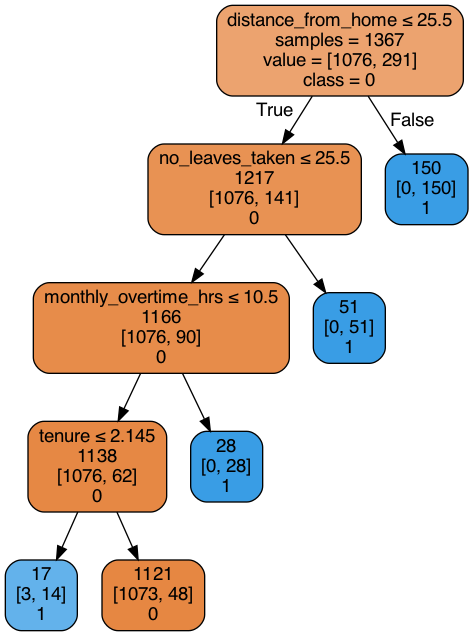

In [86]:
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary

plotDecisionTree(dt,feature_names=org_final[predictors_tree].columns, class_names=dt.classes_)

In [87]:
importances = dt.feature_importances_
imp_features = pd.DataFrame({'feature': x_train.columns, 'importance': importances})
imp_features = imp_features.sort_values('importance', ascending = False)
print(imp_features)

                feature  importance
3    distance_from_home    0.577893
8       no_leaves_taken    0.230354
6  monthly_overtime_hrs    0.135248
0                tenure    0.056504
1     mgr_effectiveness    0.000000
2          percent_hike    0.000000
4               emp_age    0.000000
5         mgr_reportees    0.000000
7      total_experience    0.000000


In [88]:
#get the accuracy score
from sklearn.metrics import accuracy_score
# Get the prediction for both train and test
prediction_train = dt.predict(x_train)
prediction_valid = dt.predict(x_test)

# Measure the accuracy of the model for both train and test sets
print("Accuracy on train is:",accuracy_score(y_train,prediction_train))
print("Accuracy on test is:",accuracy_score(y_test,prediction_valid ))

Accuracy on train is: 0.9626920263350403
Accuracy on test is: 0.9761499148211243


# Retention Strategy

In [89]:
# filter data for only active employees

org_final_active=org_final[org_final["status"]=="Active"]
org_final_active

,emp_id,status,location,level,gender,emp_age,rating,mgr_rating,mgr_reportees,mgr_age,...,cutoff_date,turnover,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction,age_diff,job_hop_index,tenure,compa_ratio
0,E10012,Active,New York,Analyst,Female,25.09,Above Average,Acceptable,9,44.07,...,2014-12-31,0,0.730,0.73,0.73,0.75,18.98,0.000000,3.578444,1.240741
1,E10025,Active,Chicago,Analyst,Female,25.98,Acceptable,Excellent,4,35.99,...,2014-12-31,0,0.581,0.72,0.84,0.85,10.01,0.542222,5.270471,0.929861
2,E10027,Active,Orlando,Specialist,Female,33.40,Acceptable,Above Average,6,35.78,...,2014-12-31,0,0.770,0.85,0.80,0.87,2.38,2.850000,9.883844,1.027738
3,E10048,Active,Chicago,Specialist,Male,24.55,Acceptable,Acceptable,10,26.70,...,2014-12-31,0,0.240,0.42,0.33,0.85,2.15,0.952000,3.616775,0.593274
4,E10060,Active,Orlando,Analyst,Male,31.23,Acceptable,Acceptable,11,34.28,...,2014-12-31,0,0.710,0.78,0.67,0.80,3.05,0.000000,3.028125,1.457870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,E9960,Active,Orlando,Analyst,Male,27.81,Excellent,Acceptable,17,35.14,...,2014-12-31,0,0.760,0.85,0.65,0.90,7.33,4.050000,2.932298,1.377083
1950,E9977,Active,Orlando,Analyst,Male,27.64,Above Average,Above Average,13,29.76,...,2014-12-31,0,0.690,0.75,0.67,0.73,2.12,2.600000,5.270471,1.265972
1951,E9980,Active,New York,Specialist,Male,27.63,Acceptable,Acceptable,5,36.56,...,2014-12-31,0,0.460,0.53,0.46,0.66,8.93,2.425000,6.535384,0.928428
1952,E9992,Active,Chicago,Specialist,Male,28.34,Acceptable,Acceptable,2,36.41,...,2014-12-31,0,0.900,0.89,0.93,0.87,8.07,1.428571,3.425122,0.835729


In [90]:
# predictors chosen with very little multicollinearity and categorical variables added back
predictors=["mgr_effectiveness","tenure", "no_leaves_taken","rating","emp_age", "location", "distance_from_home" ,"mgr_reportees", "monthly_overtime_hrs", "promotion_last_2_years",
            "total_experience","percent_hike"]
target="turnover"
x_active=pd.get_dummies(org_final_active[predictors], drop_first=True)
y_active=org_final_active[target]

In [91]:
# Directly asking the model to predict for all employees who are active
# No test and training sets
y_pred=model.predict(x_active)
y_pred_proba=model.predict_proba(x_active)

result=pd.DataFrame({"Predicted": y_pred,
                    "p(0)":[p[0] for p in y_pred_proba],
                    "p(1)":[p[1] for p in y_pred_proba]})
print(result)

      Predicted      p(0)          p(1)
0             0  0.996922  3.077946e-03
1             0  0.999999  1.131291e-06
2             0  1.000000  1.155836e-13
3             0  0.999916  8.384654e-05
4             0  0.999997  2.971293e-06
...         ...       ...           ...
1552          0  0.999556  4.442536e-04
1553          0  1.000000  1.976737e-07
1554          0  1.000000  1.723229e-07
1555          0  0.999544  4.559267e-04
1556          0  0.995317  4.683232e-03

[1557 rows x 3 columns]


In [92]:
org_final_active["risk_probability"]=result["p(1)"]
org_final_active["risk_probability"]=org_final_active["risk_probability"].fillna(0)
#org_final_active

0 < Employees with turnover probability < 0.5 --- NO risk bucket

0.5 < Employees with turnover probability < 0.6 ---- Low risk

0.6 < Employees with turnover probability < 0.8 --- High risk bucket

  Employees with turnover probability > 0.8 --- High risk bucket


In [93]:
df=org_final_active.copy()

In [94]:
# Finding high risk employees(employee ids) most likely to leave

high_risk_df= df[df["risk_probability"]>=0.8]
medium_risk_df=df[(df["risk_probability"]<0.8)&(df["risk_probability"]>=0.6)]
low_risk_df= df[(df["risk_probability"]>=0.5)& (df["risk_probability"]<0.6)]
no_risk_df= df[df["risk_probability"]<0.5]

high_risk_df["risk_probability"].count()

3

In [95]:
medium_risk_df["risk_probability"].count()

5

In [96]:
low_risk_df["risk_probability"].count()

5

In [97]:
no_risk_df["risk_probability"].count()

1544

## Retention Strategy


### High risk
If a high risk emploee is a high performer and has high potential,immidiate action planning needed.

A. Engage in a conversation with this employee to generally understand the perspective about work and future plans.

B. Ask the employee's manager to have a conversation and explore the engagement levels and concerns, if any.


### Medium risk

A. Medium term action planning.

B. Have one-on-one or open house discussion.

C. Keep tracking of any behavioral change.


### Low risk

A. Long-term action planning

B. Keep tracking for any behavioral change.

C. Have open house discussion.

### No risk

No action required.


Cost of employee turnover:

Costs to off-board employee

Cost-per-hire for replacement

Transition costs, including opportunity costs



**The most important predictor- percent_hike.
Consider giving a better percentage hike.**

In [98]:
org_fin=pd.read_csv("org_final.csv")
org_fin.fillna(0)

,emp_id,status,location,level,gender,emp_age,rating,mgr_rating,mgr_reportees,mgr_age,...,date_of_joining,last_working_date,department,mgr_id,cutoff_date,turnover,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction
0,E10012,Active,New York,Analyst,Female,25.09,Above Average,Acceptable,9,44.07,...,06/03/2011,0,Customer Operations,E9335,31/12/2014,0,0.730,0.73,0.73,0.75
1,E10025,Active,Chicago,Analyst,Female,25.98,Acceptable,Excellent,4,35.99,...,23/09/2009,0,Customer Operations,E6655,31/12/2014,0,0.581,0.72,0.84,0.85
2,E10027,Active,Orlando,Specialist,Female,33.40,Acceptable,Above Average,6,35.78,...,02/11/2005,0,Customer Operations,E13942,31/12/2014,0,0.770,0.85,0.80,0.87
3,E10048,Active,Chicago,Specialist,Male,24.55,Acceptable,Acceptable,10,26.70,...,20/05/2011,0,Customer Operations,E7063,31/12/2014,0,0.240,0.42,0.33,0.85
4,E10060,Active,Orlando,Analyst,Male,31.23,Acceptable,Acceptable,11,34.28,...,21/12/2011,0,Customer Operations,E5663,31/12/2014,0,0.710,0.78,0.67,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,E9960,Active,Orlando,Analyst,Male,27.81,Excellent,Acceptable,17,35.14,...,25/01/2012,0,Customer Operations,E3555,31/12/2014,0,0.760,0.85,0.65,0.90
1950,E9977,Active,Orlando,Analyst,Male,27.64,Above Average,Above Average,13,29.76,...,23/09/2009,0,Customer Operations,E9218,31/12/2014,0,0.690,0.75,0.67,0.73
1951,E9980,Active,New York,Specialist,Male,27.63,Acceptable,Acceptable,5,36.56,...,18/06/2008,0,Customer Operations,E8875,31/12/2014,0,0.460,0.53,0.46,0.66
1952,E9992,Active,Chicago,Specialist,Male,28.34,Acceptable,Acceptable,2,36.41,...,29/07/2011,0,Customer Operations,E13055,31/12/2014,0,0.900,0.89,0.93,0.87


In [99]:

org_hike_count=org_fin["percent_hike"].value_counts()
org_hike_count

9     229
10    220
11    214
12    198
14    181
13    180
7     180
8     170
15    100
6      67
5      49
3      41
4      30
0      30
16     16
19     16
17     15
18     12
2       6
Name: percent_hike, dtype: int64

In [100]:
#org_final["percent_hike"] = org_final["percent_hike"].astype('category')

cat_1=org_fin.loc[(org_fin["percent_hike"] >=0 ) & (org_fin["percent_hike"] < 5 ),"percent_hike"]
cat_2=org_fin.loc[(org_fin["percent_hike"] >=5 ) & (org_fin["percent_hike"] < 10 ),"percent_hike"]
cat_3=org_fin.loc[(org_fin["percent_hike"] >=10 ) & (org_fin["percent_hike"] < 15 ),"percent_hike"]
print(cat_2)


1       8
3       8
5       8
7       9
8       9
       ..
1943    9
1944    9
1945    8
1952    7
1953    8
Name: percent_hike, Length: 695, dtype: int64
